In [2]:
install.packages(c("caret", "gbm", "xgboost", "randomForest", "Metrics", "ggplot2", "readr", "dplyr", "caretEnsemble"))


The downloaded binary packages are in
	/var/folders/__/8k2h6nzx14x7ks1z7nlmpc500000gn/T//RtmpMaVemR/downloaded_packages


In [3]:
library(readr)
students_habit2 <- read.csv("students_habit2_shuffled_seed42.csv")
students_habit2

Unnamed..0,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
521,23,1,3.5,2.1,1.4,0,82.2,7.7,0,1,1,1,3,0,64.2
737,21,1,5.9,4.6,2.6,1,100.0,6.6,0,0,1,0,1,1,72.7
740,23,0,4.5,2.4,1.2,1,86.8,6.5,2,3,1,0,4,1,79.0
660,24,0,3.3,2.2,1.4,0,89.1,5.9,1,2,1,1,9,1,79.5
411,24,1,1.6,0.8,3.2,1,63.0,8.0,1,3,1,1,10,0,58.2
678,18,0,3.5,5.2,0.7,1,79.9,7.4,1,0,2,1,2,1,53.4
626,21,1,3.0,1.6,2.1,0,78.8,6.3,1,6,0,1,9,1,70.8
513,22,1,2.1,1.9,2.7,1,70.9,6.9,1,3,1,1,6,0,62.5
859,23,0,1.6,3.2,1.7,0,83.9,8.2,1,1,1,1,1,0,36.8


In [4]:
# Load necessary libraries
library(caret)
library(rpart)
library(randomForest)
library(Metrics)

# Drop columns 'X' and 'exam_score'
students_habit2_model <- students_habit2[, !(names(students_habit2) %in% c("X", "exam_score"))]
students_habit2_model <- students_habit2[, !(names(students_habit2) %in% c("Unnamed..0", "exam_score"))]

# Define the target variable (exam_score)
target <- students_habit2$exam_score

# Split data into training and testing sets
set.seed(123) # for reproducibility
trainIndex <- createDataPartition(target, p = 0.8, list = FALSE)
training_data <- students_habit2_model[trainIndex, ]
testing_data <- students_habit2_model[-trainIndex, ]
training_target <- target[trainIndex]
testing_target <- target[-trainIndex]

# Linear Regression Model
lr_model <- lm(training_target ~ ., data = training_data)
lr_predictions <- predict(lr_model, newdata = testing_data)
lr_mse <- mse(testing_target, lr_predictions)
lr_rsquared <- R2(testing_target, lr_predictions)

cat("Linear Regression Model:\n")
cat("MSE:", lr_mse, "\n")
cat("R-squared:", lr_rsquared, "\n\n")

# Decision Tree Model
dt_model <- rpart(training_target ~ ., data = training_data)
dt_predictions <- predict(dt_model, newdata = testing_data)
dt_mse <- mse(testing_target, dt_predictions)
dt_rsquared <- R2(testing_target, dt_predictions)

cat("Decision Tree Model:\n")
cat("MSE:", dt_mse, "\n")
cat("R-squared:", dt_rsquared, "\n\n")

# Random Forest Model
rf_model <- randomForest(training_target ~ ., data = training_data)
rf_predictions <- predict(rf_model, newdata = testing_data)
rf_mse <- mse(testing_target, rf_predictions)
rf_rsquared <- R2(testing_target, rf_predictions)

cat("Random Forest Model:\n")
cat("MSE:", rf_mse, "\n")
cat("R-squared:", rf_rsquared, "\n\n")

# Compare actual and predicted values (showing first few for brevity)
cat("Comparison of Actual and Predicted Values (first 10):\n")
comparison <- data.frame(Actual = testing_target[1:10],
                         Linear_Regression = lr_predictions[1:10],
                         Decision_Tree = dt_predictions[1:10],
                         Random_Forest = rf_predictions[1:10])
print(comparison)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




Linear Regression Model:
MSE: 25.98093 
R-squared: 0.9190615 

Decision Tree Model:
MSE: 77.82945 
R-squared: 0.7542875 

Random Forest Model:
MSE: 51.17592 
R-squared: 0.8863706 

Comparison of Actual and Predicted Values (first 10):
   Actual Linear_Regression Decision_Tree Random_Forest
1    64.2          65.69042      66.98046      69.01582
6    53.4          54.61655      66.98046      64.40133
9    36.8          40.75333      45.58020      44.58063
12  100.0         103.22455      96.05818      92.31786
14   74.6          72.84835      80.88000      76.28279
26   71.5          70.69411      66.98046      72.11085
31   73.7          66.05664      66.98046      71.64501
41   50.3          50.39146      45.58020      51.98688
46   71.4          82.53783      96.05818      81.30200
54   77.2          78.32029      80.50541      76.51342


### IMPROVE LINEAR TO POLY

Linear Regression:
MSE: 25.98093 
R²: 0.9190615 

Polynomial Regression (Degree 2):
MSE: 25.90191 
R²: 0.9195633 

Polynomial Regression (Degree 3):
MSE: 25.03024 
R²: 0.9220817 

So sánh 10 dòng đầu (Actual vs. Linear vs. Polynomial):
   Actual Linear_Regression Polynomial_Regression
1    64.2          65.69042              65.85759
6    53.4          54.61655              55.83505
9    36.8          40.75333              39.21848
12  100.0         103.22455             101.91621
14   74.6          72.84835              72.61496
26   71.5          70.69411              72.27364
31   73.7          66.05664              68.79105
41   50.3          50.39146              48.22674
46   71.4          82.53783              81.27263
54   77.2          78.32029              79.08844


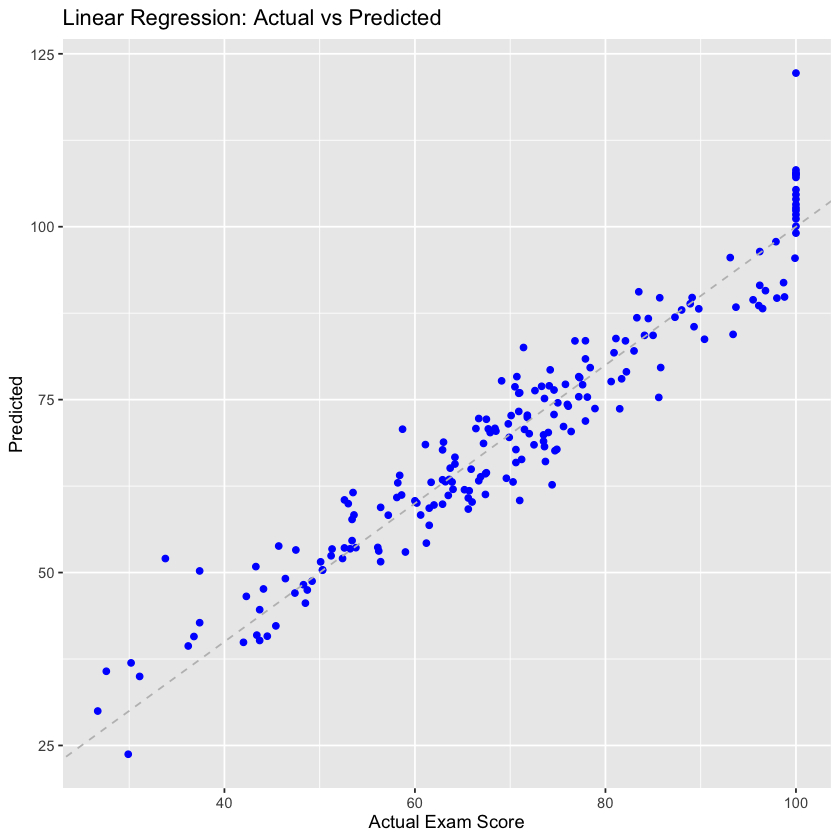

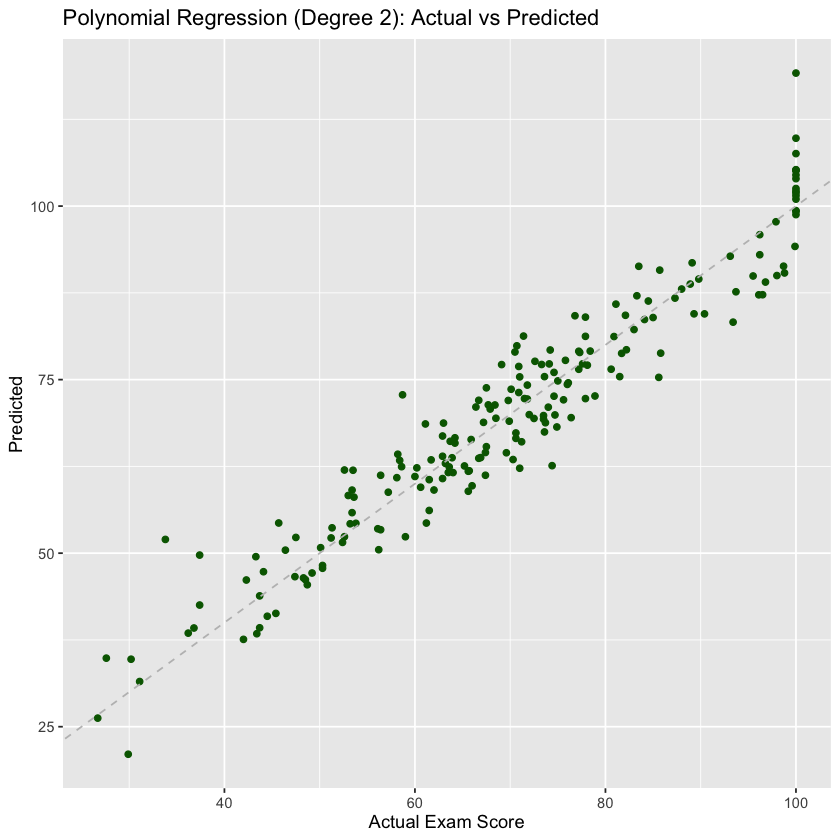

               Model      MSE        R2
1             Linear 25.98093 0.9190615
2 Polynomial (Deg 2) 25.90191 0.9195633
3 Polynomial (Deg 3) 25.03024 0.9220817


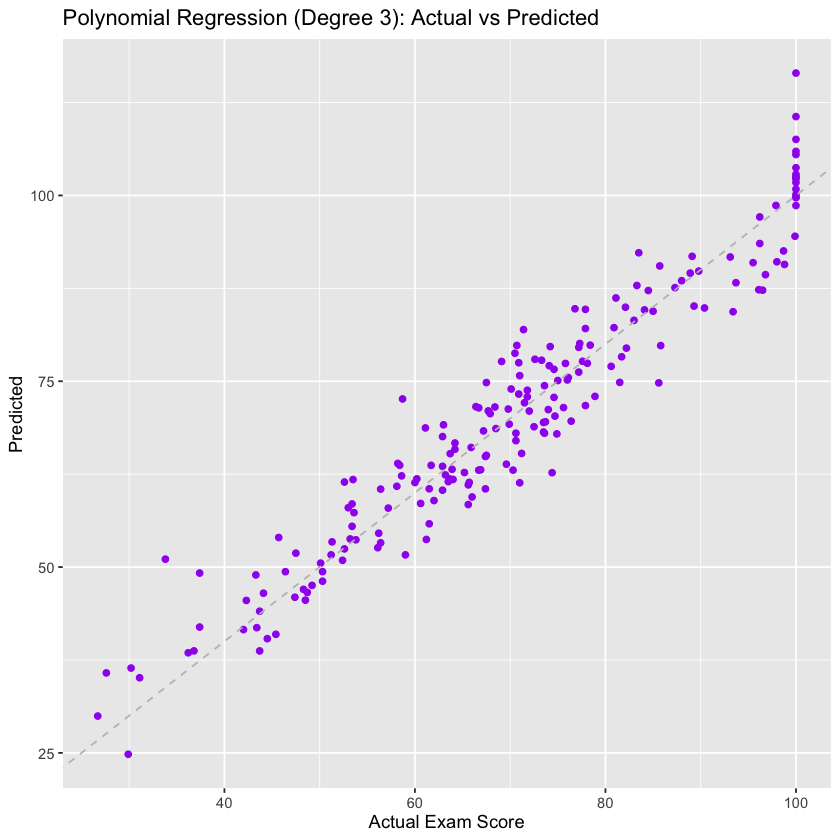

In [45]:
# Load required packages
library(caret)
library(Metrics)

# Step 1: Load data
data <- read.csv("students_habit2_shuffled_seed42.csv")

# Step 2: Remove 'Unnamed: 0' and 'exam_score' from input features
input_data <- data[, !(names(data) %in% c("Unnamed..0", "Unnamed: 0", "exam_score"))]
target <- data$exam_score

# Step 3: Train/test split
set.seed(123)
trainIndex <- createDataPartition(target, p = 0.8, list = FALSE)
train_x <- input_data[trainIndex, ]
train_y <- target[trainIndex]
test_x  <- input_data[-trainIndex, ]
test_y  <- target[-trainIndex]

# ---------- LINEAR REGRESSION ----------
lr_model <- lm(train_y ~ ., data = train_x)
lr_pred <- predict(lr_model, newdata = test_x)
lr_mse <- mse(test_y, lr_pred)
lr_r2 <- R2(test_y, lr_pred)

cat("Linear Regression:\n")
cat("MSE:", lr_mse, "\n")
cat("R²:", lr_r2, "\n\n")

# ---------- POLYNOMIAL REGRESSION (DEGREE 2) ----------
# Step 4a: Generate squared features for numeric columns

numeric_vars <- sapply(train_x, is.numeric)
numeric_names <- names(train_x)[numeric_vars]

for (var in numeric_names) {
  train_x[[paste0(var, "_2")]] <- train_x[[var]]^2
  test_x[[paste0(var, "_2")]]  <- test_x[[var]]^2
}

# Step 4b: Train polynomial regression
poly_model <- lm(train_y ~ ., data = train_x)
poly_pred <- predict(poly_model, newdata = test_x)
poly_mse <- mse(test_y, poly_pred)
poly_r2 <- R2(test_y, poly_pred)

cat("Polynomial Regression (Degree 2):\n")
cat("MSE:", poly_mse, "\n")
cat("R²:", poly_r2, "\n\n")
saveRDS(poly_model, file = "poly_model_degree2.rds")

# ---------- POLYNOMIAL REGRESSION (DEGREE 3) ----------
# Tạo biến x^3 cho các biến số học
for (var in numeric_names) {
  train_x[[paste0(var, "_3")]] <- train_x[[var]]^3
  test_x[[paste0(var, "_3")]]  <- test_x[[var]]^3
}

# Train mô hình bậc 3
poly3_model <- lm(train_y ~ ., data = train_x)
poly3_pred <- predict(poly3_model, newdata = test_x)
poly3_mse <- mse(test_y, poly3_pred)
poly3_r2 <- R2(test_y, poly3_pred)

cat("Polynomial Regression (Degree 3):\n")
cat("MSE:", poly3_mse, "\n")
cat("R²:", poly3_r2, "\n\n")

# Save mô hình bậc 3
saveRDS(poly3_model, file = "poly_model_degree3.rds")

# ---------- So sánh kết quả dự đoán ----------
cat("So sánh 10 dòng đầu (Actual vs. Linear vs. Polynomial):\n")
compare_df <- data.frame(
  Actual = test_y[1:10],
  Linear_Regression = lr_pred[1:10],
  Polynomial_Regression = poly_pred[1:10]
)
print(compare_df)

plot_data <- data.frame(
  Actual = test_y,
  Linear_Pred = lr_pred,
  Poly_Pred = poly_pred
)

# cat("Compare the first 10 lines (Actual vs. Polynomial 2 vs. Polynomial 3):\n")
# compare_df <- data.frame(
#   Actual = test_y[1:10],
#   Polynomial_Regression = poly_pred[1:10],
#   Polynomial_Regression_3 = poly3_pred[1:10]
# )
# print(compare_df)

# plot_data <- data.frame(
#   Actual = test_y,
#   Poly_Pred = poly_pred,
#   Poly3_Pred = poly3_pred
# )


# Linear Regression Plot
ggplot(plot_data, aes(x = Actual, y = Linear_Pred)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray") +
  ggtitle("Linear Regression: Actual vs Predicted") +
  xlab("Actual Exam Score") + ylab("Predicted")

# Polynomial Regression Plot
ggplot(plot_data, aes(x = Actual, y = Poly_Pred)) +
  geom_point(color = "darkgreen") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray") +
  ggtitle("Polynomial Regression (Degree 2): Actual vs Predicted") +
  xlab("Actual Exam Score") + ylab("Predicted")
plot_data$Poly3_Pred <- poly3_pred
# Degree 3 Plot
ggplot(plot_data, aes(x = Actual, y = Poly3_Pred)) +
  geom_point(color = "purple") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray") +
  ggtitle("Polynomial Regression (Degree 3): Actual vs Predicted") +
  xlab("Actual Exam Score") + ylab("Predicted")

# Bảng so sánh các mô hình
results <- data.frame(
  Model = c("Linear", "Polynomial (Deg 2)", "Polynomial (Deg 3)"),
  MSE = c(lr_mse, poly_mse, poly3_mse),
  R2 = c(lr_r2, poly_r2, poly3_r2)
)
print(results)



In [43]:
# Load necessary libraries
library(caret)
library(Metrics)
library(ggplot2)

# Load and prepare data
data <- read.csv("students_habit2_shuffled_seed42.csv")
input_data <- data[, !(names(data) %in% c("Unnamed..0", "Unnamed: 0", "exam_score"))]
target <- data$exam_score

# Train/test split
set.seed(123)
trainIndex <- createDataPartition(target, p = 0.8, list = FALSE)
train_x <- input_data[trainIndex, ]
train_y <- target[trainIndex]
test_x  <- input_data[-trainIndex, ]
test_y  <- target[-trainIndex]

# Create polynomial features
numeric_vars <- sapply(train_x, is.numeric)
numeric_names <- names(train_x)[numeric_vars]

# Add degree 2
for (var in numeric_names) {
  train_x[[paste0(var, "_2")]] <- train_x[[var]]^2
  test_x[[paste0(var, "_2")]]  <- test_x[[var]]^2
}

# Add degree 3
for (var in numeric_names) {
  train_x[[paste0(var, "_3")]] <- train_x[[var]]^3
  test_x[[paste0(var, "_3")]]  <- test_x[[var]]^3
}

# Set up 10-fold cross-validation
ctrl <- trainControl(method = "cv", number = 10)

# Linear Regression (only original features)
cv_lr <- train(
  x = train_x[, !(grepl("_2|_3", names(train_x)))],
  y = train_y,
  method = "lm",
  trControl = ctrl
)

# Polynomial Regression (degree 2)
cv_poly2 <- train(
  x = train_x[, !(grepl("_3", names(train_x)))],
  y = train_y,
  method = "lm",
  trControl = ctrl
)

# Polynomial Regression (degree 3)
cv_poly3 <- train(
  x = train_x,
  y = train_y,
  method = "lm",
  trControl = ctrl
)

# Compare results
results_cv <- data.frame(
  Model = c("Linear", "Polynomial (Deg 2)", "Polynomial (Deg 3)"),
  RMSE = c(cv_lr$results$RMSE, cv_poly2$results$RMSE, cv_poly3$results$RMSE),
  Rsquared = c(cv_lr$results$Rsquared, cv_poly2$results$Rsquared, cv_poly3$results$Rsquared)
)

print("Cross-Validation Comparison (10-fold):")
print(results_cv)


[1] "Cross-Validation Comparison (10-fold):"
               Model     RMSE  Rsquared
1             Linear 5.432995 0.8939184
2 Polynomial (Deg 2) 5.436594 0.8956085
3 Polynomial (Deg 3) 5.468224 0.8913832


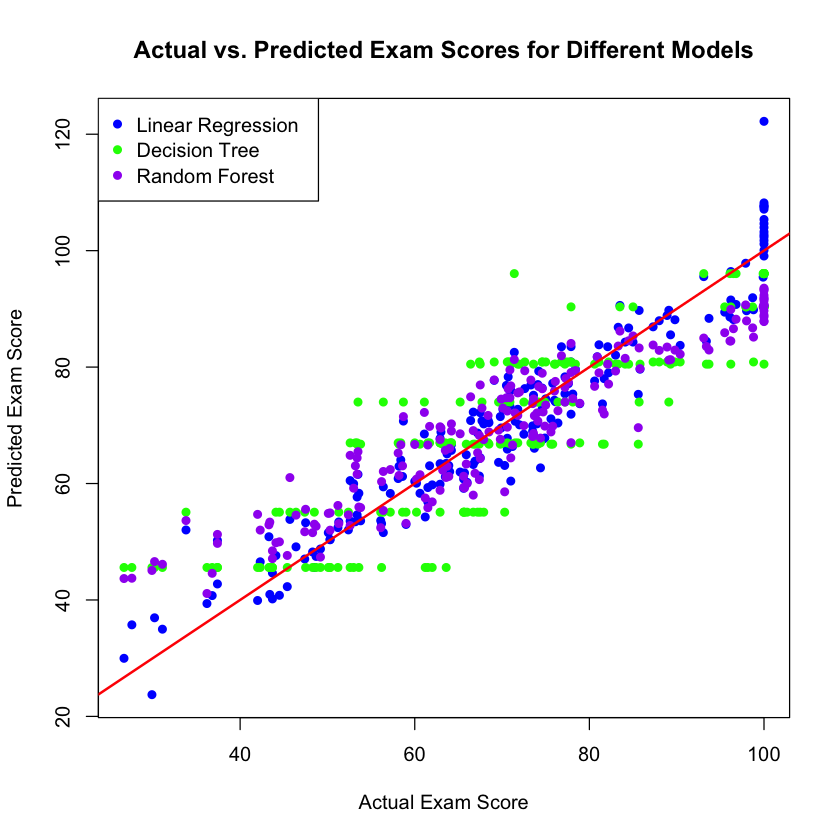

In [5]:
# Create a single scatter plot with all three models
plot(testing_target, lr_predictions,
     main = "Actual vs. Predicted Exam Scores for Different Models",
     xlab = "Actual Exam Score",
     ylab = "Predicted Exam Score",
     pch = 16, col = "blue",
     ylim = range(c(testing_target, lr_predictions, dt_predictions, rf_predictions))) # Set y-axis limits to encompass all predictions

points(testing_target, dt_predictions, pch = 16, col = "green")
points(testing_target, rf_predictions, pch = 16, col = "purple")

abline(0, 1, col = "red", lwd = 2) # Add a diagonal line for reference

# Add a legend
legend("topleft", legend = c("Linear Regression", "Decision Tree", "Random Forest"),
       col = c("blue", "green", "purple"), pch = 16)

In [15]:
# Giả sử mô hình của bạn là `lr_model`
saveRDS(lr_model, file = "lr_model.rds")


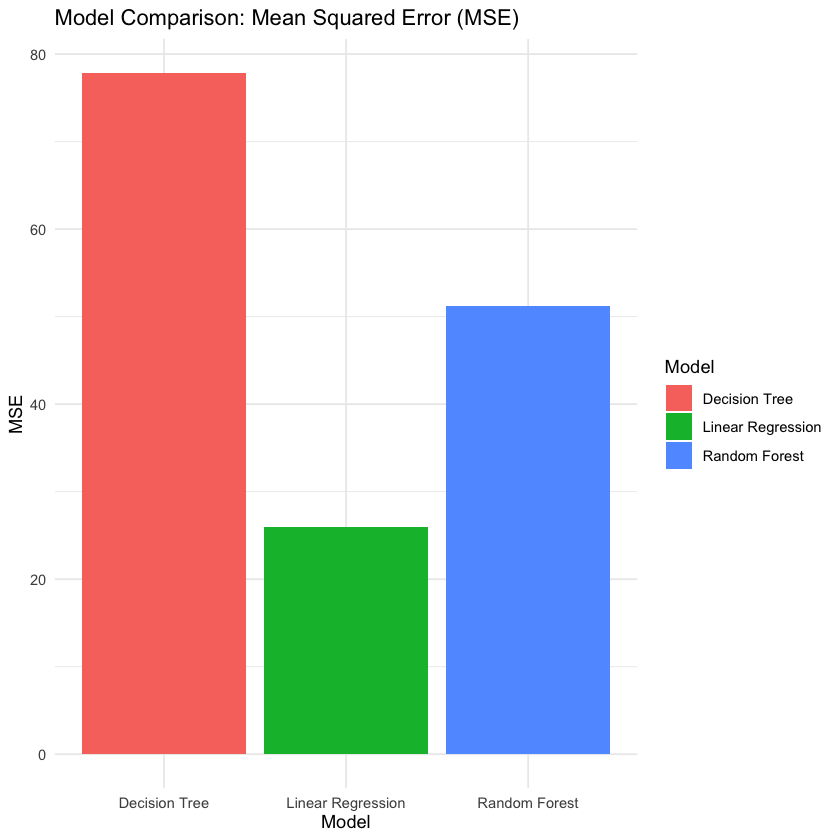

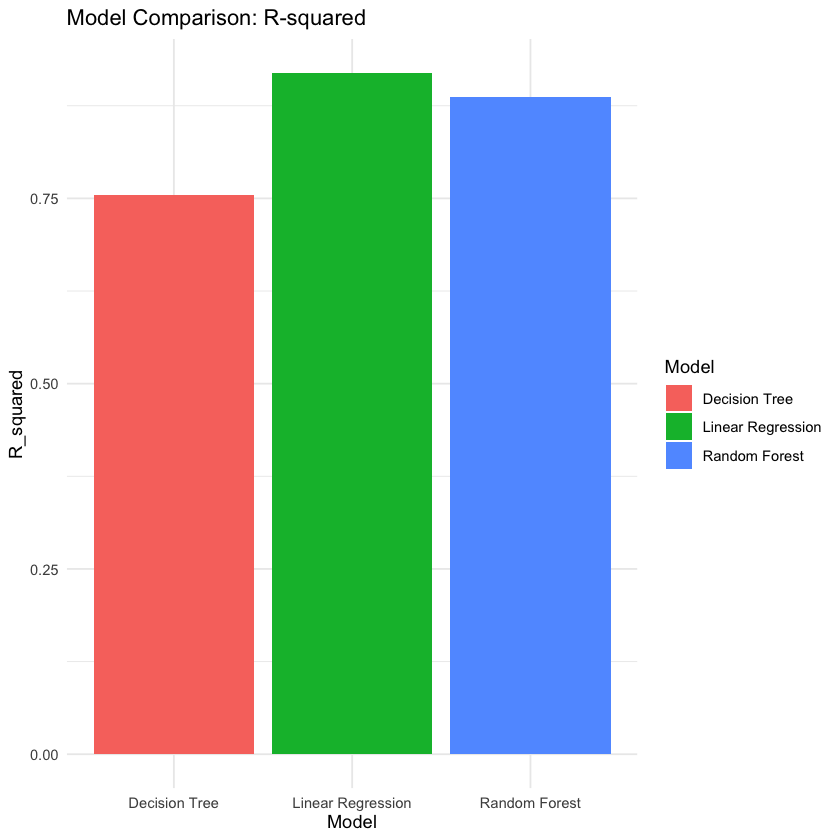

In [6]:
# Load necessary library for plotting
library(ggplot2)
library(reshape2) # For melting the data frame

# Create a data frame for the metrics
metrics_df <- data.frame(
  Model = c("Linear Regression", "Decision Tree", "Random Forest"),
  MSE = c(lr_mse, dt_mse, rf_mse),
  R_squared = c(lr_rsquared, dt_rsquared, rf_rsquared)
)

# Create bar chart for MSE using ggplot2
mse_plot <- ggplot(metrics_df, aes(x = Model, y = MSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "Model Comparison: Mean Squared Error (MSE)",
       x = "Model",
       ylab = "MSE") +
  theme_minimal()

# Create bar chart for R-squared using ggplot2
rsquared_plot <- ggplot(metrics_df, aes(x = Model, y = R_squared, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "Model Comparison: R-squared",
       x = "Model",
       ylab = "R-squared") +
  theme_minimal()

# Print the plots separately
print(mse_plot)
print(rsquared_plot)

In [7]:
install.packages("shiny")


The downloaded binary packages are in
	/var/folders/__/8k2h6nzx14x7ks1z7nlmpc500000gn/T//RtmpMaVemR/downloaded_packages


In [8]:
install.packages("jquerylib")



The downloaded binary packages are in
	/var/folders/__/8k2h6nzx14x7ks1z7nlmpc500000gn/T//RtmpMaVemR/downloaded_packages


In [9]:
install.packages("textshaping")



The downloaded binary packages are in
	/var/folders/__/8k2h6nzx14x7ks1z7nlmpc500000gn/T//RtmpMaVemR/downloaded_packages


### Run DEMO PREDICT EXAM SCORE

In [47]:
library(shiny)
library(caret)  # For model training and prediction
library(jquerylib)  # Assuming it's needed for your app
library(textshaping)  # Assuming it's needed for your app

# Assuming the linear regression model (lr_model) has already been trained and saved
# Load the saved model if you have it as an RData file
# load("path_to_your_model/lr_model.RData")  # Uncomment and adjust this line if needed

model <- readRDS("lr_model.rds")

ui <- fluidPage(
  titlePanel("Exam Score Prediction"),
  
  sidebarLayout(
    sidebarPanel(
      numericInput("age", "Age:", value = 20, min = 0, max = 100),  # Updated default value
      selectInput("gender", "Gender:",
                  choices = c("Female" = 0, "Male" = 1, "Other" = 2)),
      sliderInput("study_hours_per_day", "Study Hours per Day:", 0, 24, value = 2, step = 0.5),
      sliderInput("social_media_hours", "Social Media Hours per Day:", 0, 24, value = 3, step = 0.5),
      sliderInput("netflix_hours", "Netflix Hours per Day:", 0, 24, value = 2, step = 0.5),
      sliderInput("part_time_job", "Part-time Job Hours per Day:", 0, 24, value = 1, step = 0.5),
      sliderInput("attendance_percentage", "Attendance Percentage:", 0, 100, value = 85, step = 1),
      sliderInput("sleep_hours", "Sleep Hours per Day:", 0, 24, value = 8, step = 0.5),
      sliderInput("diet_quality", "Diet Quality (1-10):", 1, 10, value = 7, step = 1),
      sliderInput("exercise_frequency", "Exercise Frequency (days per week):", 0, 7, value = 3, step = 1),
      selectInput("parental_education_level", "Parental Education Level (0-2):", choices = c("High School" = 0, "Bachelor" = 1, "Master" = 2)),
      selectInput("internet_quality", "Internet Quality (0-2):", choices = c("Poor" = 0, "Average" = 1, "Good" = 2)),
      sliderInput("mental_health_rating", "Mental Health Rating (1-10):", 1, 10, value = 7, step = 1),
      selectInput("extracurricular_participation", "Extracurricular Participation (0-1):", choices = c("No" = 0, "Yes" = 1)),
      actionButton("predict", "Predict Exam Score")
    ),
    
    mainPanel(
      h4("Exam Score Prediction:"),
      verbatimTextOutput("prediction_output"),
      h4("Factor Influence on Exam Score:"),
      plotOutput("influence_plot"),  
      verbatimTextOutput("most_impactful"),
      verbatimTextOutput("least_impactful")
    )
  )
)

# Define server logic
server <- function(input, output) {
  observeEvent(input$predict, {
    input_data <- data.frame(
      age = input$age,
      gender = as.integer(input$gender),  # Ensure gender is numeric (0 or 1)
      study_hours_per_day = input$study_hours_per_day,
      social_media_hours = input$social_media_hours,
      netflix_hours = input$netflix_hours,
      part_time_job = as.integer(input$part_time_job),
      attendance_percentage = input$attendance_percentage,
      sleep_hours = input$sleep_hours,
      diet_quality = input$diet_quality,
      exercise_frequency = as.integer(input$exercise_frequency),
      parental_education_level = as.integer(input$parental_education_level),  # Ensure parental education level is numeric
      internet_quality = as.numeric(input$internet_quality),  # Ensure internet quality is numeric
      mental_health_rating = as.numeric(input$mental_health_rating),
      extracurricular_participation = as.integer(input$extracurricular_participation)  # Ensure extracurricular participation is numeric
    )
    prediction <- tryCatch({
      pred <- predict(model, newdata = input_data)
      paste0(round(pred, 2), " points")
    }, error = function(e) {
      paste("Prediction failed:", e$message)
    })
    output$prediction_output <- renderText({ prediction })
    # Thêm Visualization cho điểm thi
    output$influence_plot <- renderPlot({
      coefs <- coef(model)
      coefs <- coefs[-1]  # Bỏ intercept

      coef_df <- data.frame(
        Variable = names(coefs),
        Coefficient = coefs,
        AbsValue = abs(coefs)
      )

      # Sắp xếp theo ảnh hưởng
      coef_df <- coef_df[order(-coef_df$AbsValue), ]

      barplot(coef_df$Coefficient,
              names.arg = coef_df$Variable,
              las = 2,
              col = ifelse(coef_df$Coefficient > 0, "steelblue", "tomato"),
              main = "Impact of Each Factor on Exam Score",
              ylab = "Coefficient Value",
              cex.names = 0.8)
    })

    output$most_impactful <- renderPrint({
      coefs <- coef(model)[-1]
      sorted <- sort(abs(coefs), decreasing = TRUE)
      top <- names(sorted)[1]
      paste("Most impactful factor:", top, "with coefficient:", round(coefs[top], 4))
    })

    output$least_impactful <- renderPrint({
      coefs <- coef(model)[-1]
      sorted <- sort(abs(coefs), decreasing = FALSE)
      least <- names(sorted)[1]
      paste("Least impactful factor:", least, "with coefficient:", round(coefs[least], 4))
    })

  })
}


# Run the application
shinyApp(ui = ui, server = server)



Listening on http://127.0.0.1:4783



### RUN DEMO PREDICT STUDY HOURS

In [36]:
# app.R
library(shiny)

# Load the trained model
model <- readRDS("best_model_study_hours_P3_Cong Khanh.rds")

ui <- fluidPage(
  titlePanel("Predicted Study Hours/Day"),
  
  sidebarLayout(
    sidebarPanel(
      selectInput("gender", "Gender:",
                  choices = c("Female" = 0, "Male" = 1, "Other" = 2)),
      
      selectInput("part_time_job", "Part-time Job:",
                  choices = c("No" = 0, "Yes" = 1)),
      
      selectInput("diet_quality", "Diet Quality:",
                  choices = c("Fair" = 0, "Good" = 1, "Poor" = 2)),
      
      selectInput("parental_education_level", "Parental Education:",
                  choices = c("Other" = 0, "High School" = 1, "Master" = 2)),
      
      selectInput("internet_quality", "Internet Quality:",
                  choices = c("Average" = 0, "Good" = 1, "Poor" = 2)),
      
      selectInput("extracurricular_participation", "Extracurricular Participation:",
                  choices = c("No" = 0, "Yes" = 1)),
      
      sliderInput("social_media_hours", "Social Media (hrs/day):", 0, 10, value = 2, step = 0.5),
      sliderInput("netflix_hours", "Netflix (hrs/day):", 0, 10, value = 1, step = 0.5),
      sliderInput("sleep_hours", "Sleep (hrs/day):", 3, 10, value = 7, step = 0.5),
      sliderInput("attendance_percentage", "Class Attendance (%):", 0, 100, value = 90, step = 1),
      sliderInput("exam_score", "Final Exam Score:", 0, 100, value = 75, step = 1),
      
      numericInput("mental_health_rating", "Mental Health Rating (1-10):", value = 5, min = 1, max = 10),
      numericInput("exercise_frequency", "Exercise Frequency (days/week):", value = 3, min = 0, max = 7),
      
      actionButton("predict", "Predict")
    ),
    
    mainPanel(
      h4("Predicted Study Hours/Day:"),
      verbatimTextOutput("prediction_output")
    )
  )
)

server <- function(input, output) {
  observeEvent(input$predict, {
    input_data <- data.frame(
      social_media_hours = input$social_media_hours,
      netflix_hours = input$netflix_hours,
      sleep_hours = input$sleep_hours,
      mental_health_rating = as.numeric(input$mental_health_rating),
      exercise_frequency = as.numeric(input$exercise_frequency),
      exam_score = input$exam_score,
      part_time_job = as.integer(input$part_time_job),
      gender = as.integer(input$gender),
      parental_education_level = as.integer(input$parental_education_level),
      extracurricular_participation = as.integer(input$extracurricular_participation),
      attendance_percentage = input$attendance_percentage
    )
    
    prediction <- tryCatch({
      pred <- predict(model, newdata = input_data)
      paste0(round(pred, 2), " hours/day")
    }, error = function(e) {
      paste("Prediction failed:", e$message)
    })
    
    output$prediction_output <- renderText({ prediction })
  })
}

shinyApp(ui = ui, server = server)






Listening on http://127.0.0.1:4783

